## Librerias

In [1]:
'''Aqui se añadio las librerias necesarias que se usaran mas adelante '''
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from six import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
'''Ahora cargaremos el dataset diabetes '''
dfDiabetes = pd.read_csv("Dataset of Diabetes.csv")
'''Mostraremos el dataset que usaremos en el laboratorio'''
dfDiabetes.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
'''Veremos todas las columnas que tiene nuestro dataset'''
dfDiabetes.keys()

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [4]:
'''Veremos los datos de la columna CLASS'''
dfDiabetes.groupby("CLASS").size()

CLASS
N     102
N       1
P      53
Y     840
Y       4
dtype: int64

In [5]:
'''Tambien veremos los datos de la columna Gender'''
dfDiabetes.groupby("Gender").size()

Gender
F    434
M    565
f      1
dtype: int64

In [6]:
'''Como observamos que estos datos no estan correctamente para ser tratados, realizaremos unos cambios para poder trabajarlos'''
'''Modificar la mayuscula'''
dfDiabetes['Gender'] = dfDiabetes['Gender'].replace('f','F')
'''Modificar el espaciado'''
dfDiabetes['CLASS'] = dfDiabetes['CLASS'].replace('N ','N')
dfDiabetes['CLASS'] = dfDiabetes['CLASS'].replace('Y ','Y')

In [7]:
'''Comprobacion de la columna CLASS'''
dfDiabetes.groupby("CLASS").size()

CLASS
N    103
P     53
Y    844
dtype: int64

In [8]:
'''Comprobacion de la columna Gender'''
dfDiabetes.groupby("Gender").size()

Gender
F    435
M    565
dtype: int64

In [9]:
'''Realizaremos un diccionario de datos para poder convertirlos en numeros'''
diccGender = {'M': 0, 'F': 1}
diccClass = {'N': 0,'Y': 1, 'P': 2}
'''Aplicaremos los diccionarios creados mediante el mapeo de cada columna'''
dfDiabetes['Gender'] = dfDiabetes['Gender'].map(diccGender)
dfDiabetes['CLASS'] = dfDiabetes['CLASS'].map(diccClass).fillna(0.0).astype(int)
'''Veremos los cambios afectados, ahora todo son numeros'''
dfDiabetes

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,671,876534,0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,669,87654,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,99,24004,0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1


In [10]:
'''Comprobaremos el tipo de dato que tiene nuestro dataset, para poder ser trabajado'''
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int32  
dtypes: float64(8), int32(1), int64(5)
memory usage: 105.6 KB


In [11]:
'''Seleccionaremos las caracteristicas para el modelo'''
features = [ 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL','VLDL', 'BMI' ]
'''Asignaremos las caracteristicas a la variable X'''
X = dfDiabetes[features]
'''Comprobacion de la variable X'''
X

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [12]:
'''Asignamos la etiqueta a la variable y'''
y = dfDiabetes['CLASS']
'''Comprobacion de la variable y'''
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: CLASS, Length: 1000, dtype: int32

## Algoritmo Árbol de Decisión

In [13]:
'''Clasificador para el arbol de decision'''
clf = DecisionTreeClassifier()

In [14]:
'''Establecemos los parametros para el modelo, con un 70% en entrenamiento y un 30% en test '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
'''Entrenando al modelo'''
clf = clf.fit(X_train, y_train)

In [16]:
'''Almacenando las predicciones en una variable'''
y_pred = clf.predict(X_test)

## Métricas del algoritmo

In [17]:
'''Calculamos la precision del algoritmo'''
Precision = format(accuracy_score(y_test, y_pred))
print('Precision:'+ Precision)
'''Corroboramos mediante la tabla de reporte de clasificacion del algoritmo'''
print(classification_report(y_test, y_pred, target_names=['CLASS N', 'CLASS P', 'CLASS Y']))

Precision:0.9666666666666667
              precision    recall  f1-score   support

     CLASS N       0.83      0.91      0.87        32
     CLASS P       0.98      0.98      0.98       252
     CLASS Y       1.00      0.81      0.90        16

    accuracy                           0.97       300
   macro avg       0.94      0.90      0.92       300
weighted avg       0.97      0.97      0.97       300



## Graficar Arbol de Decision

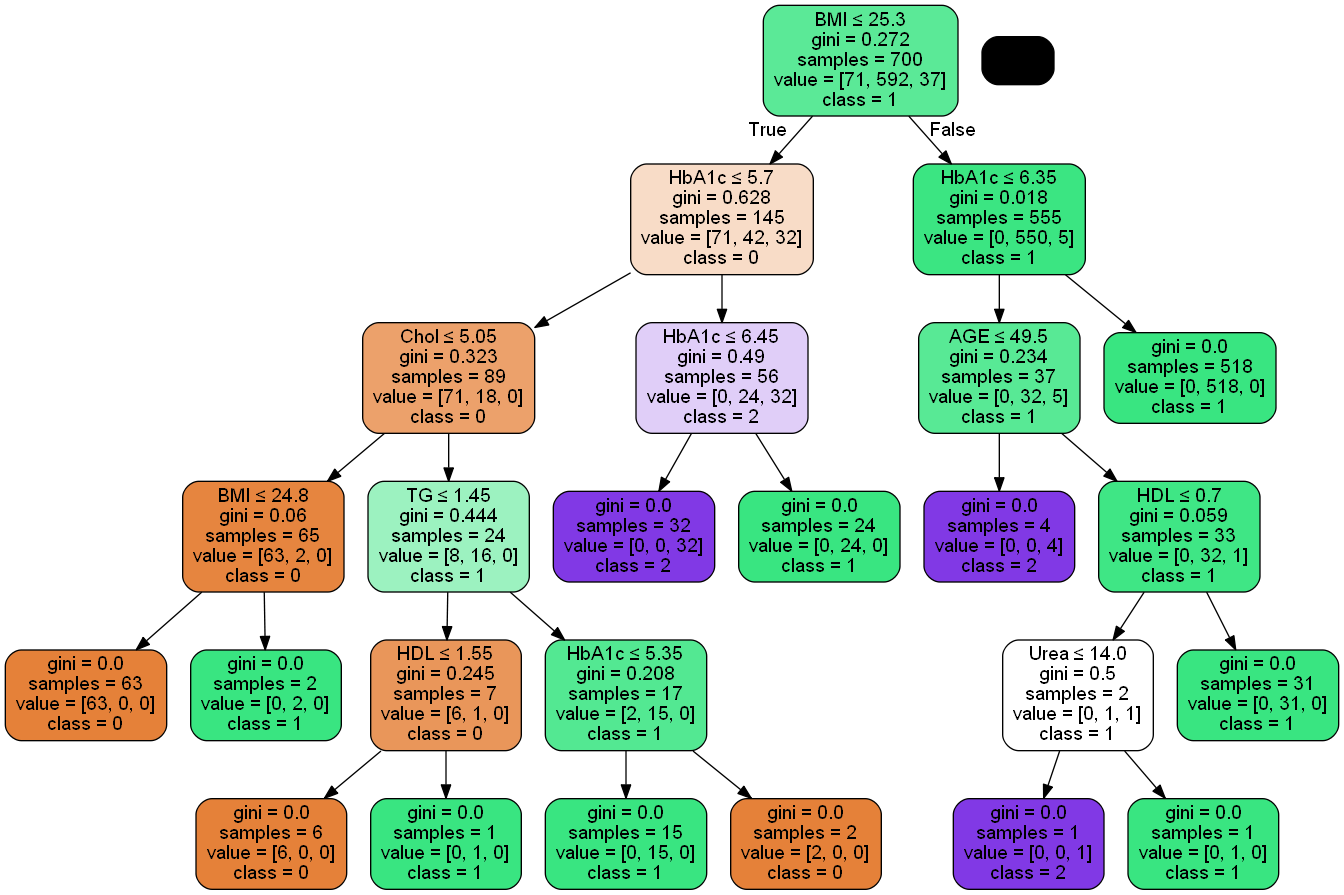

In [18]:
'''
Para poder graficar el arbol de decision tendremos que importar la función export_graphviz y un par de clases 
adicionales de sklearn, IPython y pydotplus
'''
''' Primero se creara una variable para almacenar la cadena'''
dot_data = StringIO()
'''Ahora para poder visualizarlo como imagen tendremos que usar la libreria para convertirlo en png'''
export_graphviz(clf, out_file = dot_data,filled = True, rounded = True,special_characters = True,feature_names = features,class_names = ['0', '1','2'])
'''Ahora le damos al grafico los datos de la variable creada al inicio'''
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
'''Ahora se almacenara la imagen en un png'''
graph.write_png('DiabetesArbol.png')
'''Mostrar imagen'''
Image(graph.create_png())

## Podar

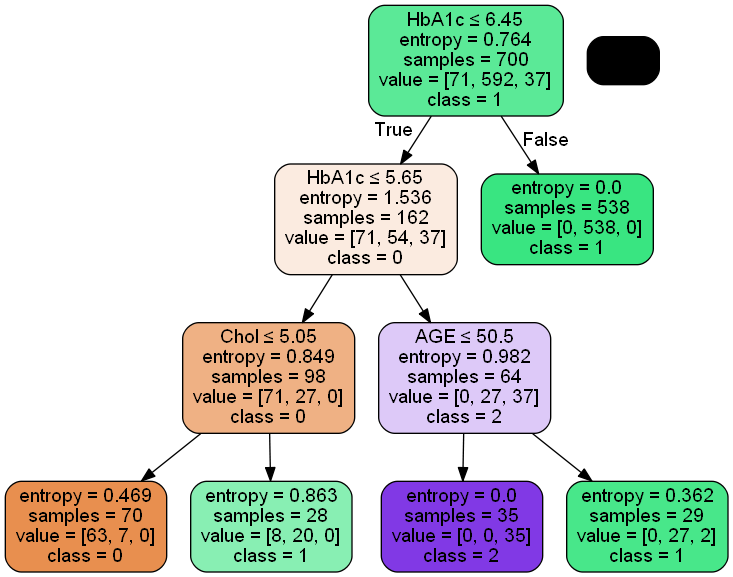

In [19]:
'''
Como el arbol es muy extenso para visualizarlo y entenderlo, lo recortaremos para que tenga un mejor tamaño
sin afectar su informacion, con una profundidad de 4
'''
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)
'''Almacenamos el entrenamiento'''
clf = clf.fit(X_train, y_train)
'''Almacenamos la prediccion'''
y_pred = clf.predict(X_test)
'''Creamos variable para la cadena'''
dot_data = StringIO()
'''Ahora para poder visualizarlo como imagen tendremos que usar la libreria para convertirlo en png'''
export_graphviz(clf, out_file = dot_data,filled = True, rounded = True,special_characters = True,feature_names = features,class_names = ['0', '1','2'])
'''Ahora le damos al grafico los datos de la variable creada al inicio'''
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
'''Ahora se almacenara la imagen en un png'''
graph.write_png('DiabetesArbolPodado.png')
'''Mostrar imagen'''
Image(graph.create_png())

## Matriz de confusión

In [20]:
'''Ahora crearemos la matriz de confusion con ayuda de y_test y y_pred'''
MatrizConfusion = confusion_matrix(y_test, y_pred)
'''Visualizaremos la matriz de confusion'''
print(MatrizConfusion)

[[ 26   6   0]
 [  8 244   0]
 [  0   0  16]]


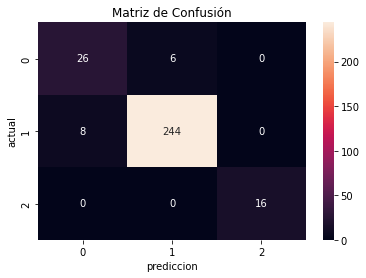

In [26]:
'''Ahora para poder visualizar la matriz en formato figura usaremos heatmap'''
sns.heatmap(MatrizConfusion,annot=True,fmt="d")
'''Creamos un encabezado al grafico'''
plt.title("Matriz de Confusión", position=(0.5, 0.9))
'''Ponemos un titulo al eje X '''
plt.xlabel('prediccion');
'''Ponemos un titulo al eje y'''
plt.ylabel('actual');
'''Guardamos la figura en una imagen png'''
plt.savefig('matrizConfusion.png')